### Name: Abhinav Deepak Mali
### Roll Number: 0084
### Batch: T3
### Class: TE Computer
### Subject: Data Science and Big Data Analytics
### Assignment Number: 8

Data Visualization I
1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information
about the passengers who boarded the unfortunate Titanic ship. Use the Seaborn library to
see if we can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger
is distributed by plotting a histogram.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [3]:
data = pd.read_csv("C:/Users/user/OneDrive/Documents/DSBDA/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data_isna = data.isna().sum()
data_isna[data_isna > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

# 1. Deleting columns with most unique values

In [9]:
data_str = data.copy()
for i in data_str.columns:
    data_str[i] = data_str[i].apply(lambda x: str(x))
data_str.replace('nan',np.nan,inplace=True)

data_str.describe(include='object').T.sort_values(by='unique', ascending=False)

,count,unique,top,freq
PassengerId,891,891,1,1
Name,891,891,"Braund, Mr. Owen Harris",1
Ticket,891,681,347082,7
Fare,891,248,8.05,43
Cabin,204,147,B96 B98,4
Age,714,88,24.0,30
SibSp,891,7,0,608
Parch,891,7,0,678
Pclass,891,3,3,491
Embarked,889,3,S,644


In [10]:
data = data.drop(columns=[
    # too many unique values
    'PassengerId','Name','Ticket',
    # too many null values
    'Cabin'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
data_str = data.copy()
for i in data_str.columns:
  data_str[i] = data_str[i].apply(lambda x:str(x))
data_str.replace('nan',np.nan,inplace=True)

data_unique = data_str.describe(include='object').T.sort_values(by='unique',ascending=False)
data = data[data_unique.index]
data_unique

,count,unique,top,freq
Fare,891,248,8.05,43
Age,714,88,24.0,30
SibSp,891,7,0,608
Parch,891,7,0,678
Pclass,891,3,3,491
Embarked,889,3,S,644
Survived,891,2,0,549
Sex,891,2,male,577


# 1. Visualizing categorical columns

The categorical columns will be visualised by barplot, while its correlation to each other will be visualised by heatmap

## 1.1 Finding total count for each column using bargraph

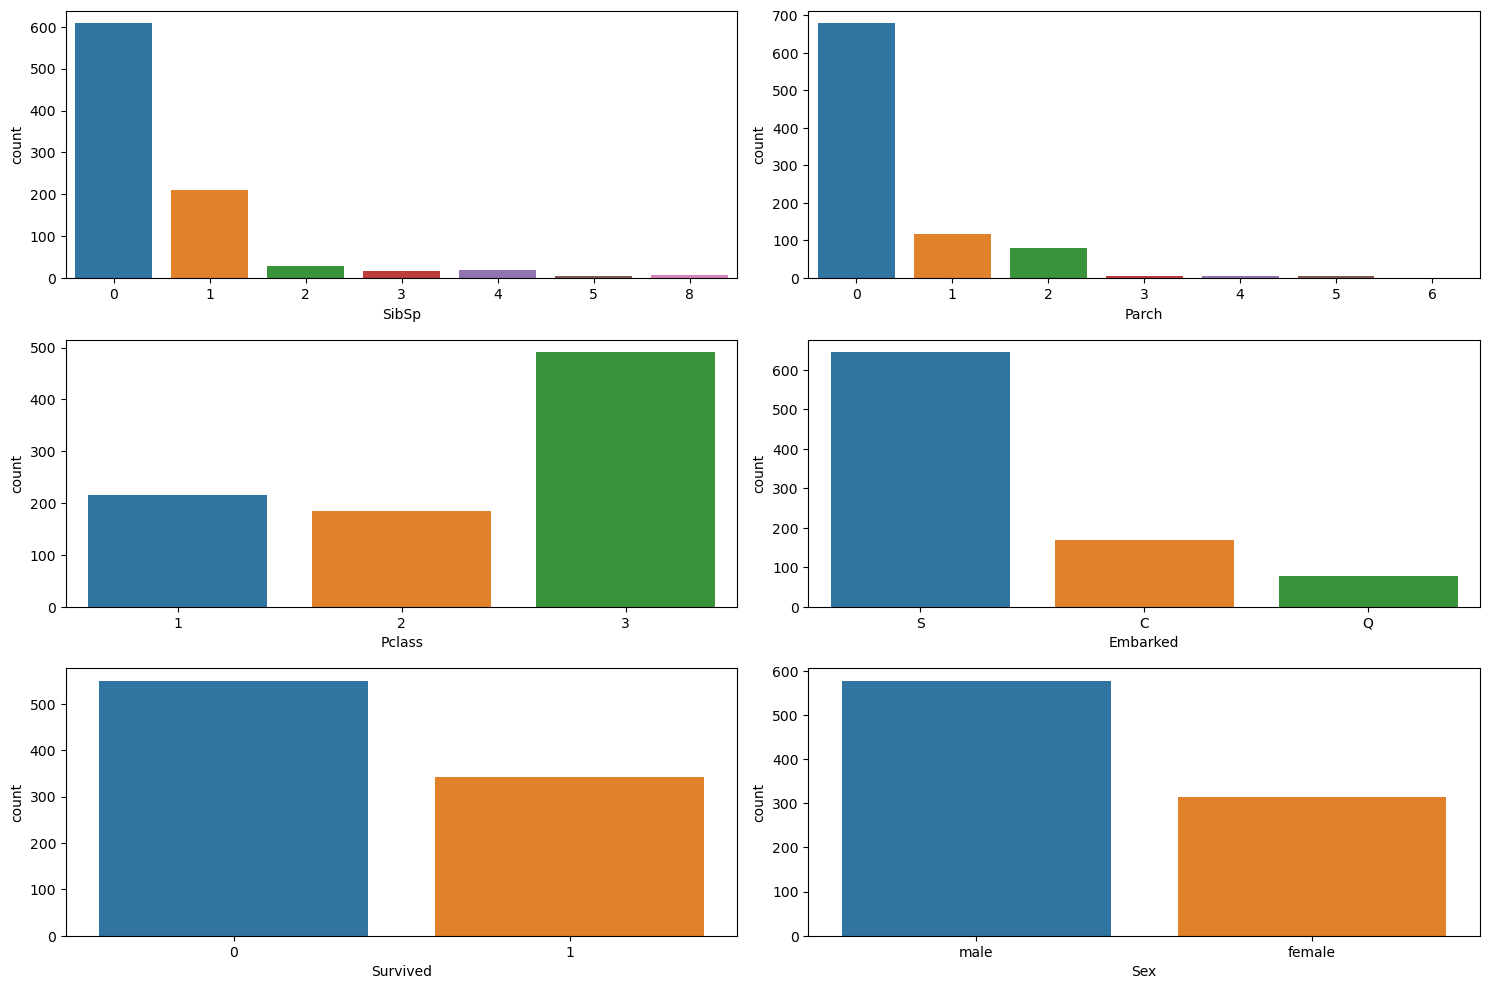

In [14]:
fig,axes=plt.subplots(3,2,figsize=(15,10))
sns.countplot(data=data,x=data.columns[2],ax=axes[0,0])
sns.countplot(data=data,x=data.columns[3],ax=axes[0,1])
sns.countplot(data=data,x=data.columns[4],ax=axes[1,0])
sns.countplot(data=data,x=data.columns[5],ax=axes[1,1])
sns.countplot(data=data,x=data.columns[6],ax=axes[2,0])
sns.countplot(data=data,x=data.columns[7],ax=axes[2,1])
plt.tight_layout()

## 1.2 Plotting correlation heatmap to find relation between each column

<Axes: >

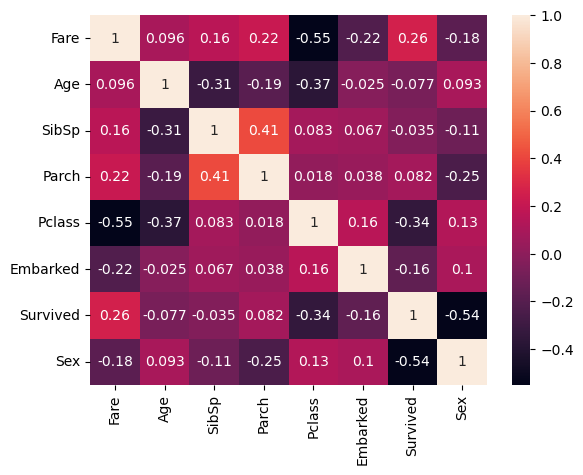

In [19]:
from sklearn.preprocessing import LabelEncoder

cat_encs = ['Embarked', 'Sex']
le = LabelEncoder()

data_cat = data.copy()

for column in cat_encs:
    data_cat[column] = le.fit_transform(data_cat[column])
    
sns.heatmap(data_cat.corr(),annot=True)

## 1.3 Finding correlation between survival rate and other columns

In [20]:
pd.DataFrame(data_cat.corr()['Survived']).sort_values(by='Survived',ascending=False).iloc[1:]

,Survived
Fare,0.257307
Parch,0.081629
SibSp,-0.035322
Age,-0.077221
Embarked,-0.163517
Pclass,-0.338481
Sex,-0.543351


# 2. Visualizing numerical columns

The numerical columns will be visualised by histogram and boxplot, while its correlation to each other will be visualised by scatterplot

## 2.1 Plotting a regression graph for Age vs Fare

<Axes: xlabel='Fare', ylabel='Age'>

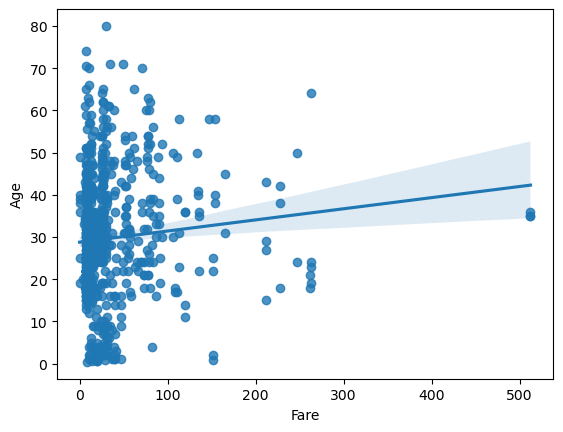

In [21]:
sns.regplot(data=data,x='Fare',y='Age')

## 2.2 Finding survival rate of passengers based on fare price and age

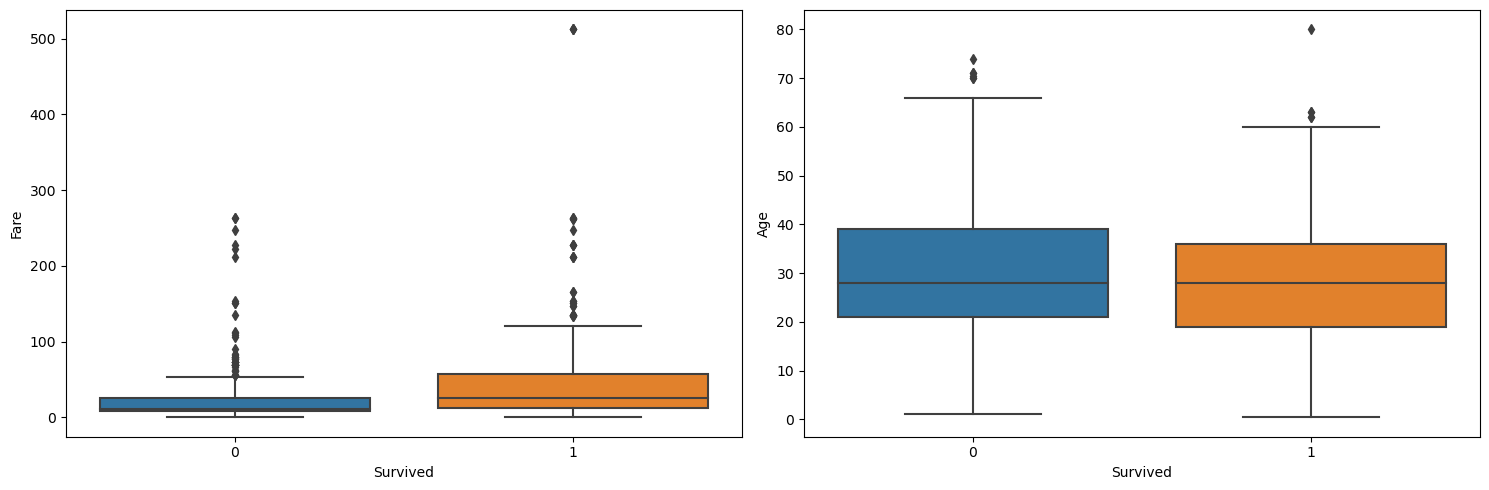

In [22]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=data,x=data.columns[6],y=data.columns[0],ax=axes[0])
sns.boxplot(data=data,x=data.columns[6],y=data.columns[1],ax=axes[1])
plt.tight_layout()

## 2.3 Finding passenger count for each fare price range

<Axes: xlabel='Fare', ylabel='Count'>

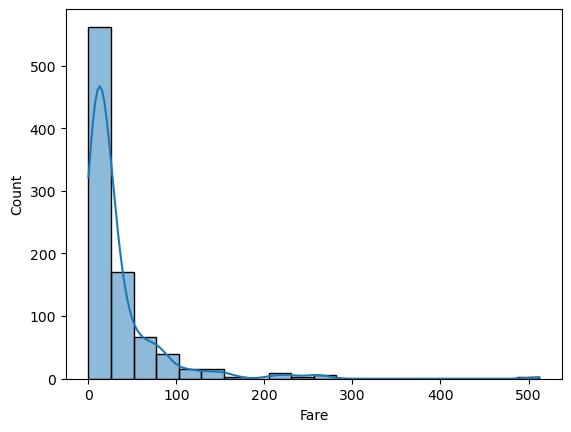

In [23]:
sns.histplot(data['Fare'], bins=20, kde=True)